# Pca

In [33]:
import pandas as pd
import csv
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [53]:
data = pd.read_csv('drills_p2_arg.csv', sep=';')
data = data.drop(data.index[0])
data.head()

,Drills,Duration,Distance (m),Distance/time (m/min),HSR Abs Dist (m),Ext Accels (>2 m/s2),Diff Acc/des (count),Sprints Abs (count),Distance Abs(m),Max Speed (km/h),AVG Heart Rate (BPM),HMLD (m),Player Load (u.a.)
1,Alejandra Torres-Quevedo,0:36:54,"4869,17","131,93","1476,43","219,00","-31,00","20,00","326,34","27,17","134,00","1287,15","80,32"
2,Alicia Magaz,0:28:34,"3821,80","133,77","1032,94","118,00","-20,00","7,00","198,16","24,58","0,00","899,13","50,99"
3,Beatriz Perez,0:44:27,"5721,59","128,70","1473,37","253,00","-18,00","17,00","295,19","26,32","168,00","1323,12","79,06"
4,Belen Iglesias,0:40:24,"5374,00","133,02","1847,59","205,00","-19,00","18,00","343,24","24,79","140,00","1353,81","65,30"
5,Berta Bonastre,0:37:19,"5154,96","138,13","1427,81","178,00","-24,00","13,00","178,97","23,83","168,00","1169,29","71,18"


In [54]:
def hms_to_s(input_time):
    t=input_time.split(':')
    total_minutes= int(t[0])*60+int(t[1])*1 +int(t[2])/60 
    return total_minutes

duration=data['Duration']
duration_min=[hms_to_s(row) for row in duration]
print(duration_min)
data['Duration'] =duration_min




[36.9, 28.566666666666666, 44.45, 40.4, 37.31666666666667, 56.9, 41.46666666666667, 26.016666666666666, 48.68333333333333, 51.233333333333334, 49.06666666666667, 40.68333333333333, 51.416666666666664, 52.88333333333333, 46.85, 32.516666666666666, 68.05]


In [55]:
target = 'Player Load (u.a.)'
players= 'Drills'
players_column = data['Drills']
targets_column= data[target]
features = list(data.columns)
features.remove(target)
features.remove(players)
x = data.loc[:, features].values
y = data.loc[:,[target,players]].values
x[:5]

array([[36.9, '4869,17', '131,93', '1476,43', '219,00', '-31,00',
        '20,00', '326,34', '27,17', '134,00', '1287,15'],
       [28.566666666666666, '3821,80', '133,77', '1032,94', '118,00',
        '-20,00', '7,00', '198,16', '24,58', '0,00', '899,13'],
       [44.45, '5721,59', '128,70', '1473,37', '253,00', '-18,00',
        '17,00', '295,19', '26,32', '168,00', '1323,12'],
       [40.4, '5374,00', '133,02', '1847,59', '205,00', '-19,00',
        '18,00', '343,24', '24,79', '140,00', '1353,81'],
       [37.31666666666667, '5154,96', '138,13', '1427,81', '178,00',
        '-24,00', '13,00', '178,97', '23,83', '168,00', '1169,29']],
      dtype=object)

Se normaliza la matriz. 

array([[36.9, '4869,17', '131,93', '1476,43', '219,00', '-31,00',
        '20,00', '326,34', '27,17', '134,00', '1287,15'],
       [28.566666666666666, '3821,80', '133,77', '1032,94', '118,00',
        '-20,00', '7,00', '198,16', '24,58', '0,00', '899,13'],
       [44.45, '5721,59', '128,70', '1473,37', '253,00', '-18,00',
        '17,00', '295,19', '26,32', '168,00', '1323,12'],
       [40.4, '5374,00', '133,02', '1847,59', '205,00', '-19,00',
        '18,00', '343,24', '24,79', '140,00', '1353,81'],
       [37.31666666666667, '5154,96', '138,13', '1427,81', '178,00',
        '-24,00', '13,00', '178,97', '23,83', '168,00', '1169,29']],
      dtype=object)

In [45]:
x_std = StandardScaler().fit_transform(x)
x_std[:5]

ValueError: could not convert string to float: '4869,17'

Se crea una instancia PCA y se hace un plot para ver para visualizar todas las varianzas.


In [12]:
pca = PCA(n_components=4)
principal_components = pca.fit_transform(x_std)

([<matplotlib.axis.XTick at 0x7f75fb807748>,
 <a list of 4 Text xticklabel objects>)

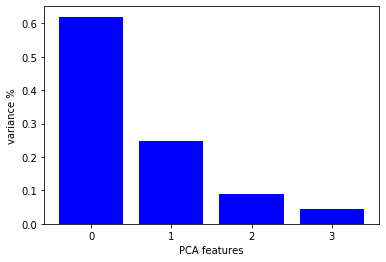

In [14]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Los primeros dos componentes explican la mayoria de la varianza de los datos.

In [17]:
PCA_components = pd.DataFrame(principal_components)
PCA_components.head(5)

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


Text(0, 0.5, 'PCA 2')

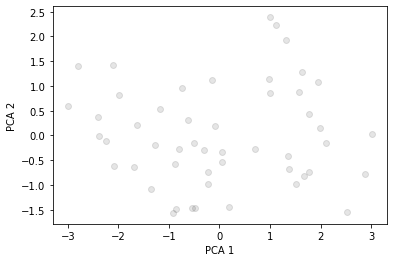

In [18]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

La figura de arriba muestra los datos representados con los dos componentes primcipales pc1 y pc2. Los datos estśn dispersos y no se observan distintos clusters. Cada punto representa un estado.

Vamos a encontrar los clusters.Utilizamos k-means para visualizar los dos PCA. Primero utilizamos el método del codo para encontrar e número de clústers óptimos. 

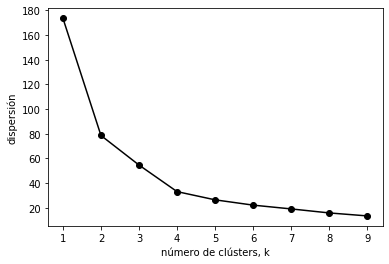

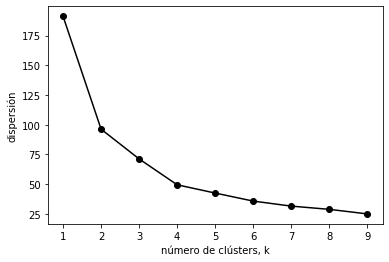

In [21]:
ks = range(1, 10)
inertias = []
n_components = 2
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:n_components])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('número de clústers, k')
plt.ylabel('dispersión')
plt.xticks(ks)
plt.show()

inertias = []
n_components = 3
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:n_components])
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('número de clústers, k')
plt.ylabel('dispersión')
plt.xticks(ks)
plt.show()

El número de clústers óptimo es 4. 

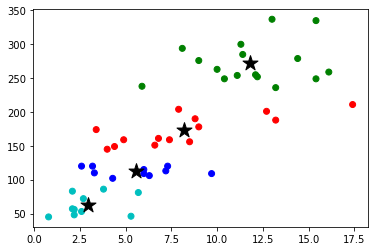

In [34]:


color_map = np.array(['b','g','r','c','m','y','k'])

kmeans = KMeans(n_clusters = 4,
                random_state = 1).fit(x)
classes = kmeans.predict(x)

plt.scatter(x[:, 0], x[:, 1],
        color = color_map[classes])
plt.scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')

Reduciendo todas las a variables a pca y luego visualizando los clusters en esos componentes principales usando k-means, podemos observar que los diferetnes estados se pueden agrupar en función de asalto,aesinato y violación. 

In [35]:
print(kmeans.labels_)
print(kmeans.get_params)
print(type(classes))

[1 1 1 2 1 2 0 1 1 2 3 0 1 0 3 0 0 1 3 1 2 1 3 1 2 0 0 1 3 2 1 1 1 3 0 2 2
 0 2 1 3 2 2 0 3 2 2 3 3 2]
<bound method BaseEstimator.get_params of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)>
<class 'numpy.ndarray'>


In [36]:
data['cluster number'] = classes

In [37]:
data

,State,Murder,Assault,UrbanPop,Rape,cluster number
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2
